--- Task 2: TensorFlow MNIST CNN ---
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


Training the CNN model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8998 - loss: 0.3266 - val_accuracy: 0.9792 - val_loss: 0.0645
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9795 - loss: 0.0660 - val_accuracy: 0.9840 - val_loss: 0.0500
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9875 - loss: 0.0415 - val_accuracy: 0.9866 - val_loss: 0.0415
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9877 - val_loss: 0.0382
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9871 - val_loss: 0.0435
Model training complete.

--- Model Evaluation ---
313/313 - 2s - 6ms/step - accuracy: 0.9871 - loss: 0.0435


Test Accuracy: 0.9871
Model saved as 'mnist_cnn_model.h5'

--- Visualizing Predictions ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Saved prediction visualization as 'mnist_predictions.png'
--------------------------------------



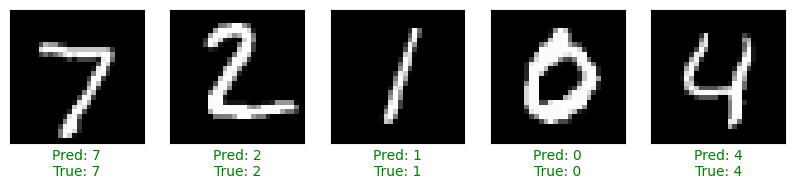

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

print("--- Task 2: TensorFlow MNIST CNN ---")

# 1. Load and Preprocess the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values from [0, 255] to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit the model
# CNNs expect a 4D tensor: (batch_size, height, width, channels)
# MNIST images are grayscale, so channels=1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

# 2. Build the CNN Model
model = Sequential([
    # Convolutional Layer: 32 filters, 3x3 kernel
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Pooling Layer: 2x2 window
    MaxPooling2D((2, 2)),

    # Flatten the 3D feature maps to 1D
    Flatten(),

    # Fully Connected Layer: 128 neurons
    Dense(128, activation='relu'),

    # Dropout for regularization (helps prevent overfitting)
    Dropout(0.2),

    # Output Layer: 10 neurons (one for each digit 0-9)
    # Softmax activation gives probabilities for each class
    Dense(10, activation='softmax')
])

# 3. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use this loss because labels are integers
              metrics=['accuracy'])

model.summary()

# 4. Train the Model
print("\nTraining the CNN model...")
# Training for 5 epochs is usually enough to get >95%
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print("Model training complete.")

# 5. Evaluate the Model
print("\n--- Model Evaluation ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the trained model for the bonus task
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")


# 6. Visualize Predictions on 5 Sample Images
print("\n--- Visualizing Predictions ---")
predictions = model.predict(x_test)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Reshape test image back to 2D for plotting
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)

# Save the plot as an image for your report
plt.savefig('mnist_predictions.png')
print("Saved prediction visualization as 'mnist_predictions.png'")
# plt.show() # Uncomment this if running locally to display the plot

print("--------------------------------------\n")